# Задания

## <font color='red'>Задание 1.</font>
Изобразить эллиптические кривые:
- с $\;D>0$;  

- с $\;D<0$;

- с самопересечением;

- с каспом.  

### Решение

In [1]:
import matplotlib.pyplot as plt
import random
import sympy as smp
import numpy as np
import math

In [2]:
a = -1
b = 1
D = 27 * b ** 2 + 4 * a ** 3

$\href{https://ru.stackoverflow.com/questions/741048/%D0%9A%D0%B0%D0%BA-%D0%B2-matplotlib-%D0%BF%D0%BE%D1%81%D1%82%D1%80%D0%BE%D0%B8%D1%82%D1%8C-%D0%B3%D1%80%D0%B0%D1%84%D0%B8%D0%BA-%D0%BD%D0%B5%D1%8F%D0%B2%D0%BD%D0%BE%D0%B9-%D1%84%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D0%B8}{Помог}$ построить график неявной функции.

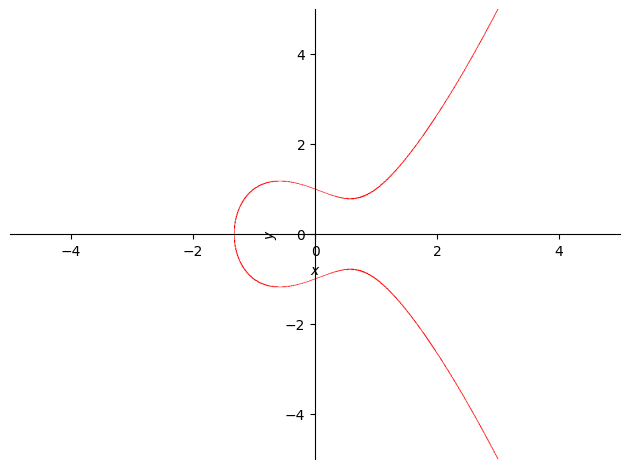

In [3]:
smp.var('x y')
smp.plot_implicit(smp.Eq(x ** 3 + a * x + b - y ** 2, 0), line_color='red')

## <font color='red'>Задания 2 - 5.</font>

### <font color='red'>Задание 2.</font>
Реализовать класс `Curve`, который хранит $\;a, b, p\;$ эллиптической кривой
$$
  y^2=x^3+ax+b\mod p.
$$  

### <font color='red'>Задание 3.</font>
Реализовать класс `Point`, объектом которого является точка с координатами $\;(x,y)\;$ кривой `Curve`.

### <font color='red'>Задание 4.</font>
Для класса `Curve` реализовать методы нахождения всех точек кривой при помощи полного перебора и при помощи алгоритма Тонелли-Шенкса. Реализовать метод, который находит порядок кривой. Реализовать метод, который находит случайную точку кривой.

### <font color='red'>Задание 5.</font>
Для класса `Point` реализовать нахождение противоположного элемента, вычитание и сложение точек. Проверить выполнение ассоциативности.

### Решение

#### Классы

In [77]:
class Curve:
    """docstring"""
    
    def __init__(self, a, b, p):
        self.__a = a
        self.__b = b
        self.__p = p
        
    def getCoeffs(self):
        return self.__a, self.__b
    
    def getMod(self):
        return self.__p
    
    def getPoints(self):
        points = []
        for x in range(self.__p):
            a = x ** 3 + self.__a * x + self.__b
            if not Jacobi(a, self.__p) == 1:
                continue
            y = Shanks(a, self.__p)
            temp_point1 = Point(x, math.sqrt(y))
            temp_point2 = Point(x, -math.sqrt(y))
            points += [temp_point1, temp_point2]
        return points
    
    def getRandomPoint(self):
        x = random.randint(0, self.__p)
        a = x ** 3 + self.__a * x + self.__b
        points = []
        while not Jacobi(a, self.__p) == 1:
            x = random.randint(0, self.__p)
            a = x ** 3 + self.__a * x + self.__b
        y = Shanks(a, self.__p)
        temp_point1 = Point(x, math.sqrt(y))
        temp_point2 = Point(x, -math.sqrt(y))
        points += [temp_point1, temp_point2]
        return points[random.randint(0, 1)]
    
    def getOrder(self):
        return len(self.getPoints())

In [63]:
class Point():
    """docstring"""    
    
    def __init__(self, x, y):
        self.__x = x
        self.__y = y
        
    def getX(self):
        return self.__x
    
    def getY(self):
        return self.__y
    
    def __repr__(self):
        return '({0}, {1})'.format(self.__x, self.__y)

#### Вспомогательные функции

In [47]:
def st(n):
    s = 0
    t = n
    while t % 2 == 0:
        s += 1
        t = t // 2
    return s, t

def Jacobi(a,n):
    if n < 0 or not n % 2:
        raise ValueError("n should be an odd positive integer") 
    j = 1
    if n == 1:
        return j
    if a<0:
        a = -a
        if n%4 == 3:
            j = -j
    while n>1:
        if a == 0:
            return 0
        s,t = st(a)
        if (s%2 == 1) & (n%8 in [3, 5]):
            j = -j
        if 3 == n%4 == t%4:
            j = -j
        a = n%t
        n = t
    return j

def Shanks(a, p):
    if not Jacobi(a, p) == 1:
        raise ValueError("a should be a quadratic residue")
    s, t = st(p-1)
    import random
    n = random.randint(2, p - 2)
    while Jacobi(n, p) == 1:
        n = random.randint(2, p - 2)
    b = pow(n, t, p)
    r = pow(int(a), (t+1)//2, p)
    d = 0
    f = pow(int(a), t, p)
    b2 = b
    for i in range(1,s):
        b2 = b2 * b2 % p
        if not pow(f, 2 ** (s - 1 - i), p) == 1:
            d += 2 ** i
            f = f * b2 % p 
    return r*pow(b, d//2, p) % p

#### Проверка

In [78]:
curve1 = Curve(-1, 1, 13)

In [68]:
point1 = Point(1, 3)

In [69]:
pts = curve1.getPoints()

In [60]:
for pt in pts:
    print(pt)
    
X = [pt.getX() for pt in pts]
Y = [pt.getY() for pt in pts]

(0, 1.0)
(0, -1.0)
(1, 1.0)
(1, -1.0)
(3, 2.23606797749979)
(3, -2.23606797749979)
(4, 1.7320508075688772)
(4, -1.7320508075688772)
(5, 3.3166247903554)
(5, -3.3166247903554)
(6, 3.0)
(6, -3.0)
(7, 2.23606797749979)
(7, -2.23606797749979)
(10, 3.0)
(10, -3.0)
(12, 1.0)
(12, -1.0)


(x, y)

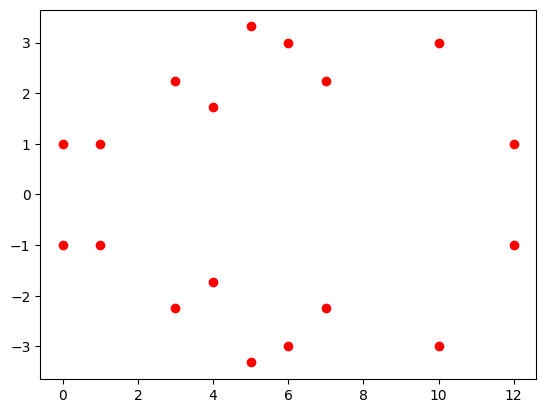

In [52]:
plt.plot(X, Y, 'ro')
smp.var('x y')

In [59]:
curve1.getRandomPoint()

(12, 1.0)

In [79]:
curve1.getOrder()

18